In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

In [3]:
data= pd.read_excel("../data/5G Datset.xlsx", engine='openpyxl')
data

,User Device Type,Duration(sec),Paket Loss Rate(Reliability),Packet Delay Budget( Latency(ms)),Bandwidth(GHz),Delay Rate(Mbps),Speed(Mbps),Jitter(ps),Modulation Type,Slice Type
0,SmartPhone,600,0.010000,50,30,17500,1082,43000000,FBMC,embb
1,SmartPhone,100,0.010000,7,38,1700,2647,45000000,FBMC,embb
2,SmartPhone,240,0.000010,46,38,900,2821,65000000,FBMC,embb
3,SmartPhone,120,0.000100,12,50,900,864,77000000,FBMC,embb
4,SmartPhone,60,0.000001,49,60,1700,1945,33000000,FBMC,embb
...,...,...,...,...,...,...,...,...,...,...
2995,BlutoothDevices,180,0.010000,40,38,1700,1476,77000000,GFDM,mMTC
2996,BlutoothDevices,100,0.000010,28,29,300,512,10000000,GFDM,mMTC
2997,BlutoothDevices,180,0.000001,25,29,300,1752,65000000,GFDM,mMTC
2998,BlutoothDevices,300,0.001000,20,45,300,453,45000000,GFDM,mMTC


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   User Device Type                   3000 non-null   object 
 1   Duration(sec)                      3000 non-null   int64  
 2   Paket Loss Rate(Reliability)       3000 non-null   float64
 3   Packet Delay Budget( Latency(ms))  3000 non-null   int64  
 4   Bandwidth(GHz)                     3000 non-null   int64  
 5   Delay Rate(Mbps)                   3000 non-null   int64  
 6   Speed(Mbps)                        3000 non-null   int64  
 7   Jitter(ps)                         3000 non-null   int64  
 8   Modulation Type                    3000 non-null   object 
 9   Slice Type                         3000 non-null   object 
dtypes: float64(1), int64(6), object(3)
memory usage: 234.5+ KB


In [5]:
categoric = ['User Device Type', 'Modulation Type', 'Slice Type']
for cat in categoric:
    print("Value count for: ", cat)
    print(data[cat].unique(), data[cat].nunique())

Value count for:  User Device Type
['SmartPhone' 'AR/VR/Gaming' 'IOTDevices' 'HealthCare'
 'TansportationDevices' 'PersonalComputers' 'Industry'
 'PublicSafetyDevices' 'CommunicationDevices' 'BlutoothDevices'] 10
Value count for:  Modulation Type
['FBMC' 'UFMC' 'GFDM' 'fOFDM' 'QAM' 'OFDM'] 6
Value count for:  Slice Type
['embb' 'URLLC' 'mMTC' 'eMBB' 'URRLC'] 5


In [6]:
data['Slice Type'] = data['Slice Type'].replace({'embb': 'eMBB', 'URLLC': 'URRLC'})

In [7]:
lb = LabelEncoder()
for cat in categoric:
    data[cat] = lb.fit_transform(data[cat])
data

,User Device Type,Duration(sec),Paket Loss Rate(Reliability),Packet Delay Budget( Latency(ms)),Bandwidth(GHz),Delay Rate(Mbps),Speed(Mbps),Jitter(ps),Modulation Type,Slice Type
0,8,600,0.010000,50,30,17500,1082,43000000,0,1
1,8,100,0.010000,7,38,1700,2647,45000000,0,1
2,8,240,0.000010,46,38,900,2821,65000000,0,1
3,8,120,0.000100,12,50,900,864,77000000,0,1
4,8,60,0.000001,49,60,1700,1945,33000000,0,1
...,...,...,...,...,...,...,...,...,...,...
2995,1,180,0.010000,40,38,1700,1476,77000000,1,2
2996,1,100,0.000010,28,29,300,512,10000000,1,2
2997,1,180,0.000001,25,29,300,1752,65000000,1,2
2998,1,300,0.001000,20,45,300,453,45000000,1,2


In [8]:
x=data.drop(['Slice Type'],axis=1)
y=data['Slice Type']

In [9]:
x.shape, y.shape

((3000, 9), (3000,))

In [10]:
scaler = MinMaxScaler()
X_data_minmax = scaler.fit_transform(x.drop(['User Device Type', 'Modulation Type'], axis=1))
X_data_minmax

array([[1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
        1.00000000e+00, 3.49610037e-01, 5.10791367e-01],
       [7.40740741e-02, 1.00000000e+00, 1.22448980e-01, ...,
        8.13953488e-02, 8.80298406e-01, 5.39568345e-01],
       [3.33333333e-01, 9.00090009e-04, 9.18367347e-01, ...,
        3.48837209e-02, 9.39301458e-01, 8.27338129e-01],
       ...,
       [2.22222222e-01, 0.00000000e+00, 4.89795918e-01, ...,
        0.00000000e+00, 5.76805697e-01, 8.27338129e-01],
       [4.44444444e-01, 9.99099910e-02, 3.87755102e-01, ...,
        0.00000000e+00, 1.36317396e-01, 5.39568345e-01],
       [1.00000000e+00, 9.00090009e-04, 7.95918367e-01, ...,
        3.48837209e-02, 5.90369617e-01, 5.10791367e-01]])

In [11]:

x = pd.concat([pd.DataFrame(X_data_minmax), x[['User Device Type','Modulation Type']]], axis=1, ignore_index=True)
x

,0,1,2,3,4,5,6,7,8
0,1.000000,1.000000,1.000000,0.032258,1.000000,0.349610,0.510791,8,0
1,0.074074,1.000000,0.122449,0.290323,0.081395,0.880298,0.539568,8,0
2,0.333333,0.000900,0.918367,0.290323,0.034884,0.939301,0.827338,8,0
3,0.111111,0.009901,0.224490,0.677419,0.034884,0.275687,1.000000,8,0
4,0.000000,0.000000,0.979592,1.000000,0.081395,0.642252,0.366906,8,0
...,...,...,...,...,...,...,...,...,...
2995,0.222222,1.000000,0.795918,0.290323,0.081395,0.483215,1.000000,1,1
2996,0.074074,0.000900,0.551020,0.000000,0.000000,0.156324,0.035971,1,1
2997,0.222222,0.000000,0.489796,0.000000,0.000000,0.576806,0.827338,1,1
2998,0.444444,0.099910,0.387755,0.516129,0.000000,0.136317,0.539568,1,1


In [12]:
x.rename(columns={0:'Duration(sec)',1:'Paket Loss Rate(Reliability)',2:'Packet Delay Budget(Latency(ms))',3:'Bandwidth(GHz)',4:'Delay Rate(Mbps)',5:'Speed(Mbps)',6:'Jitter(ps)', 7:'User Device Type', 8:'Modulation Type'}, inplace=True)

In [13]:
x

,Duration(sec),Paket Loss Rate(Reliability),Packet Delay Budget(Latency(ms)),Bandwidth(GHz),Delay Rate(Mbps),Speed(Mbps),Jitter(ps),User Device Type,Modulation Type
0,1.000000,1.000000,1.000000,0.032258,1.000000,0.349610,0.510791,8,0
1,0.074074,1.000000,0.122449,0.290323,0.081395,0.880298,0.539568,8,0
2,0.333333,0.000900,0.918367,0.290323,0.034884,0.939301,0.827338,8,0
3,0.111111,0.009901,0.224490,0.677419,0.034884,0.275687,1.000000,8,0
4,0.000000,0.000000,0.979592,1.000000,0.081395,0.642252,0.366906,8,0
...,...,...,...,...,...,...,...,...,...
2995,0.222222,1.000000,0.795918,0.290323,0.081395,0.483215,1.000000,1,1
2996,0.074074,0.000900,0.551020,0.000000,0.000000,0.156324,0.035971,1,1
2997,0.222222,0.000000,0.489796,0.000000,0.000000,0.576806,0.827338,1,1
2998,0.444444,0.099910,0.387755,0.516129,0.000000,0.136317,0.539568,1,1


In [17]:
x.to_csv('../data/processed/x.csv', index=False)
y.to_csv('../data/processed/y.csv', index=False)

In [14]:
from sklearn.model_selection import train_test_split as tts

X_train, X_test, y_train, y_test = tts(x, y, test_size=0.30, random_state=10)
print('Shape of X_train=',X_train.shape)
print('Shape of X_test=',X_test.shape)
print('Shape of y_train=',y_train.shape)
print('Shape of y_test=',y_test.shape)

Shape of X_train= (2100, 9)
Shape of X_test= (900, 9)
Shape of y_train= (2100,)
Shape of y_test= (900,)


In [66]:
from sklearn import svm

#clf_linear = svm.SVC(kernel='linear')
#clf_poly= svm.SVC(kernel='poly')
clf_rbf = svm.SVC(C=50,kernel='rbf',gamma=1)


In [67]:
#clf_linear1=clf_linear.fit(X_train, y_train)
#clf_poly1=clf_poly.fit(X_train, y_train)
clf_rbf1=clf_rbf.fit(X_train, y_train)

In [68]:
Yp =  clf_rbf1.predict(X_test)
#Yp =  clf_poly1.predict(X_test)

In [69]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt
precision = precision_score(y_test, Yp, average= 'macro')
recall = recall_score(y_test, Yp, average= 'macro')
print('Precision: %.3f' %precision)
print('Recall: %.3f' %recall)
print('Accuracy: %.3f' % accuracy_score(y_test, Yp))
print('F1 Score: %.3f' % f1_score(y_test, Yp, average= 'macro'))

Precision: 0.596
Recall: 0.606
Accuracy: 0.610
F1 Score: 0.600


In [70]:
from sklearn.metrics import classification_report, confusion_matrix
print (classification_report(y_test, Yp))

              precision    recall  f1-score   support

           0       0.62      0.61      0.62       394
           1       0.51      0.59      0.55       169
           2       0.65      0.62      0.64       337

    accuracy                           0.61       900
   macro avg       0.60      0.61      0.60       900
weighted avg       0.61      0.61      0.61       900



In [71]:
print (confusion_matrix(y_test, Yp))

[[240  64  90]
 [ 48  99  22]
 [ 96  31 210]]


# KNN

In [72]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix 

In [73]:
X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.20, random_state = 0)

In [74]:

knn_clf=KNeighborsClassifier(n_neighbors=5, weights='distance', p=1)
# , algorithm='auto', leaf_size=30, metric='minkowski', metric_params=None, n_jobs=None, p=1, weights='distance'
knn_clf.fit(X_train,y_train)
ypred=knn_clf.predict(X_test) #These are the predicted output values

In [75]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt
precision = precision_score(y_test, ypred, average= 'macro')
recall = recall_score(y_test, ypred, average= 'macro')
print('Precision: %.3f' %precision)
print('Recall: %.3f' %recall)
print('Accuracy: %.3f' % accuracy_score(y_test, ypred))
print('F1 Score: %.3f' % f1_score(y_test, ypred, average= 'macro'))

Precision: 0.656
Recall: 0.649
Accuracy: 0.655
F1 Score: 0.652


In [76]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, ypred)
print('Confusion Matrix:')
print(result)
result1 = classification_report(y_test, ypred)
print('Classification Report:',)
print (result1)
result2 = accuracy_score(y_test,ypred)
print('Accuracy:', result2)

Confusion Matrix:
[[176  30  62]
 [ 34  79  18]
 [ 54   9 138]]
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.66      0.66       268
           1       0.67      0.60      0.63       131
           2       0.63      0.69      0.66       201

    accuracy                           0.66       600
   macro avg       0.66      0.65      0.65       600
weighted avg       0.66      0.66      0.65       600

Accuracy: 0.655


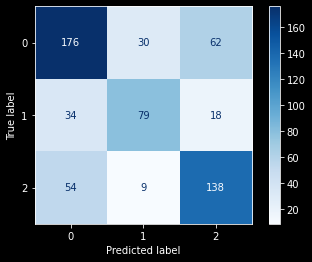

In [77]:
plot_confusion_matrix(knn_clf,X_test,y_test,cmap=plt.cm.Blues)

**MLP**

In [52]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=1)
print(X_train.shape); print(X_test.shape)

(2250, 9)
(750, 9)


In [79]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(8,8,8), activation='relu', solver='adam', max_iter=500)
mlp.fit(X_train,y_train)

predict_train = mlp.predict(X_train)
predict_test = mlp.predict(X_test)

In [80]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt
precision = precision_score(y_test, predict_test, average= 'macro')
recall = recall_score(y_test, predict_test, average= 'macro')
print('Precision: %.3f' %precision)
print('Recall: %.3f' %recall)
print('Accuracy: %.3f' % accuracy_score(y_test, predict_test))
print('F1 Score: %.3f' % f1_score(y_test, predict_test, average= 'macro'))

Precision: 0.715
Recall: 0.737
Accuracy: 0.723
F1 Score: 0.720


In [81]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_train,predict_train))
print(classification_report(y_train,predict_train))

[[684 128 224]
 [ 68 386  55]
 [148  29 678]]
              precision    recall  f1-score   support

           0       0.76      0.66      0.71      1036
           1       0.71      0.76      0.73       509
           2       0.71      0.79      0.75       855

    accuracy                           0.73      2400
   macro avg       0.73      0.74      0.73      2400
weighted avg       0.73      0.73      0.73      2400



# Dense

In [23]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [56]:
model = Sequential()

model.add(Dense(256, activation='relu', input_dim=9))
# model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(3, activation='softmax'))

# Note that we use a “softmax” activation 
# function in the output layer. This is to ensure 
# the output values are in the range of 0 and 1 
# and the max will be the predicted class.


model.compile(loss='categorical_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

In [33]:
# y_train = pd.get_dummies(y_train).values
# y_test = pd.get_dummies(y_test).values
y = pd.get_dummies(y)

In [57]:
model.fit(X_train, y_train, epochs=400, batch_size=64, verbose=2, validation_data=(X_test, y_test))

Epoch 1/400
36/36 - 1s - loss: 1.0031 - accuracy: 0.4902 - val_loss: 0.8918 - val_accuracy: 0.5467 - 571ms/epoch - 16ms/step
Epoch 2/400
36/36 - 0s - loss: 0.9055 - accuracy: 0.5636 - val_loss: 0.8467 - val_accuracy: 0.5733 - 161ms/epoch - 4ms/step
Epoch 3/400
36/36 - 0s - loss: 0.8501 - accuracy: 0.5973 - val_loss: 0.7966 - val_accuracy: 0.6200 - 164ms/epoch - 5ms/step
Epoch 4/400
36/36 - 0s - loss: 0.8571 - accuracy: 0.5840 - val_loss: 0.7833 - val_accuracy: 0.6227 - 169ms/epoch - 5ms/step
Epoch 5/400
36/36 - 0s - loss: 0.8240 - accuracy: 0.6222 - val_loss: 0.7647 - val_accuracy: 0.6467 - 160ms/epoch - 4ms/step
Epoch 6/400
36/36 - 0s - loss: 0.8212 - accuracy: 0.6320 - val_loss: 0.7568 - val_accuracy: 0.6280 - 155ms/epoch - 4ms/step
Epoch 7/400
36/36 - 0s - loss: 0.8182 - accuracy: 0.6289 - val_loss: 0.7467 - val_accuracy: 0.6693 - 163ms/epoch - 5ms/step
Epoch 8/400
36/36 - 0s - loss: 0.8034 - accuracy: 0.6484 - val_loss: 0.7435 - val_accuracy: 0.6640 - 166ms/epoch - 5ms/step
Epoch 9

# DBN

In [82]:
from dbn.tensorflow import SupervisedDBNClassification
from sklearn.metrics import accuracy_score

In [83]:
X_train, X_test, y_train, y_test = train_test_split(x.values, y.values,test_size=0.20, random_state = 0)

In [84]:
X_train

array([[1.00000000e+00, 9.00090009e-04, 1.00000000e+00, ...,
        1.00000000e+00, 5.00000000e+00, 3.00000000e+00],
       [7.40740741e-02, 0.00000000e+00, 7.95918367e-01, ...,
        5.39568345e-01, 6.00000000e+00, 5.00000000e+00],
       [4.44444444e-01, 0.00000000e+00, 5.51020408e-01, ...,
        0.00000000e+00, 4.00000000e+00, 0.00000000e+00],
       ...,
       [3.33333333e-01, 1.00000000e+00, 2.85714286e-01, ...,
        5.10791367e-01, 3.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00, 2.24489796e-01, ...,
        5.39568345e-01, 7.00000000e+00, 2.00000000e+00],
       [3.33333333e-01, 1.00000000e+00, 2.85714286e-01, ...,
        1.65467626e-01, 2.00000000e+00, 2.00000000e+00]])

In [85]:
classifier = SupervisedDBNClassification(hidden_layers_structure =[256, 256], learning_rate_rbm=0.05, learning_rate=0.01, n_epochs_rbm=20, n_iter_backprop=150, batch_size=32, activation_function='relu', dropout_p=0.15)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print('\nAccuracy of Prediction: %f' % accuracy_score(y_test, y_pred))

[START] Pre-training step:
>> Epoch 1 finished 	RBM Reconstruction error 2.448952
>> Epoch 2 finished 	RBM Reconstruction error 1.009839
>> Epoch 3 finished 	RBM Reconstruction error 1.006363
>> Epoch 4 finished 	RBM Reconstruction error 18.459250
>> Epoch 5 finished 	RBM Reconstruction error 17.496517
>> Epoch 6 finished 	RBM Reconstruction error 7.293933
>> Epoch 7 finished 	RBM Reconstruction error 14.869955
>> Epoch 8 finished 	RBM Reconstruction error 28.212945
>> Epoch 9 finished 	RBM Reconstruction error 12.295531
>> Epoch 10 finished 	RBM Reconstruction error 8.097160
>> Epoch 11 finished 	RBM Reconstruction error 5.362117
>> Epoch 12 finished 	RBM Reconstruction error 9.483521
>> Epoch 13 finished 	RBM Reconstruction error 9.478645
>> Epoch 14 finished 	RBM Reconstruction error 32.094611
>> Epoch 15 finished 	RBM Reconstruction error 9.445925
>> Epoch 16 finished 	RBM Reconstruction error 23.754011
>> Epoch 17 finished 	RBM Reconstruction error 18.368338
>> Epoch 18 finished 	

# XGBoost

In [70]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

In [71]:
# read in data
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)
# specify parameters via map
param = {'max_depth':20, 'eta':0.05, 'objective': 'multi:softmax', 'num_class':78, 'tree_method': 'gpu_hist' }
num_round = 100
watchlist = [(dtrain, 'train'), (dtest, 'test')]
bst = xgb.train(param, dtrain, num_round, watchlist)
# make prediction
preds_test = bst.predict(dtest)
preds_train = bst.predict(dtrain)

[15:18:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softmax' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	train-mlogloss:3.35459	test-mlogloss:3.34076
[1]	train-mlogloss:3.00360	test-mlogloss:2.99409
[2]	train-mlogloss:2.76195	test-mlogloss:2.75674
[3]	train-mlogloss:2.57065	test-mlogloss:2.56888
[4]	train-mlogloss:2.41368	test-mlogloss:2.41702
[5]	train-mlogloss:2.28079	test-mlogloss:2.28964
[6]	train-mlogloss:2.16307	test-mlogloss:2.18177
[7]	train-mlogloss:2.06037	test-mlogloss:2.08502
[8]	train-mlogloss:1.96457	test-mlogloss:1.99984
[9]	train-mlogloss:1.87776	test-mlogloss:1.92357
[10]	train-mlogloss:1.79994	test-mlogloss:1.85526
[11]	train-mlogloss:1.72755	test-mlogloss:1.79346
[12]	train-mlogloss:1.65860	test-mlogloss:1.73793
[13]	train-mlogloss:1.59328	test-mlogloss:1.68822


In [73]:
accuracy_score(y_train, preds_train)

1.0

In [72]:
accuracy_score(y_test, preds_test)

0.6833333333333333